<a href="https://colab.research.google.com/github/Ponch-byte98/Telecom-X_Alura-2/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [5]:
import pandas as pd

datos = pd.read_json('/content/TelecomX_Data.json' )

df = pd.DataFrame(datos)

df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [9]:
df_customer = df['customer'].apply(pd.Series)
df_phone = df['phone'].apply(pd.Series)
df_internet = df['internet'].apply(pd.Series)
df_account = df['account'].apply(pd.Series)


df = pd.concat([df.drop(columns=['customer', 'phone', 'internet', 'account']),
                      df_customer, df_phone, df_internet, df_account], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7267 non-null   object
 1   Churn             7267 non-null   object
 2   gender            7267 non-null   object
 3   SeniorCitizen     7267 non-null   int64 
 4   Partner           7267 non-null   object
 5   Dependents        7267 non-null   object
 6   tenure            7267 non-null   int64 
 7   PhoneService      7267 non-null   object
 8   MultipleLines     7267 non-null   object
 9   InternetService   7267 non-null   object
 10  OnlineSecurity    7267 non-null   object
 11  OnlineBackup      7267 non-null   object
 12  DeviceProtection  7267 non-null   object
 13  TechSupport       7267 non-null   object
 14  StreamingTV       7267 non-null   object
 15  StreamingMovies   7267 non-null   object
 16  Contract          7267 non-null   object
 17  PaperlessBilli

In [12]:
df.head(2)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4


In [10]:
for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, dict)).any():
        print(f"La columna '{col}' contiene diccionarios.")

charges_expanded = pd.json_normalize(df['Charges'])
df = pd.concat([df.drop(columns=['Charges']), charges_expanded], axis=1)

La columna 'Charges' contiene diccionarios.


In [11]:
print("Valores nulos por columna:\n", df.isnull().sum())
print("\nDuplicados:", df.duplicated().sum())


print("\nTipos de datos:\n", df.dtypes)

for col in df.columns:
    print(f"\nColumna: {col}")
    print(df[col].unique())

Valores nulos por columna:
 customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Monthly             0
Total               0
dtype: int64

Duplicados: 0

Tipos de datos:
 customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract        

In [13]:
import numpy as np


df['Total'] = pd.to_numeric(df['Total'], errors='coerce')
print("Valores NaN en 'Total':", df['Total'].isnull().sum())


df['Churn'] = df['Churn'].replace('', np.nan)
print("Valores NaN en 'Churn':", df['Churn'].isnull().sum())

df_clean = df.dropna(subset=['Churn'])


print("Datos después de limpieza de 'Churn':")
print(df['Churn'].value_counts(dropna=False))
print("Dimensiones después de limpieza:", df.shape)

Valores NaN en 'Total': 11
Valores NaN en 'Churn': 224
Datos después de limpieza de 'Churn':
Churn
No     5174
Yes    1869
NaN     224
Name: count, dtype: int64
Dimensiones después de limpieza: (7267, 21)


In [14]:
df['Cuentas_Diarias'] = df['Monthly'] / 30
print(df[['Monthly', 'Cuentas_Diarias']].head())

   Monthly  Cuentas_Diarias
0     65.6         2.186667
1     59.9         1.996667
2     73.9         2.463333
3     98.0         3.266667
4     83.9         2.796667


In [15]:
df.head(2)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,1.996667


#📊 Carga y análisis

In [20]:
df.describe()

,SeniorCitizen,tenure,Monthly,Total,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7256.000000,7267.000000
mean,0.162653,32.346498,64.720098,2280.634213,2.157337
std,0.369074,24.571773,30.129572,2268.632997,1.004319
min,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.425000,400.225000,1.180833
50%,0.000000,29.000000,70.300000,1391.000000,2.343333
75%,0.000000,55.000000,89.875000,3785.300000,2.995833
max,1.000000,72.000000,118.750000,8684.800000,3.958333


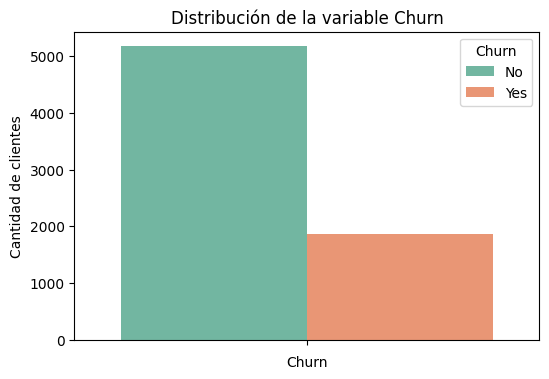

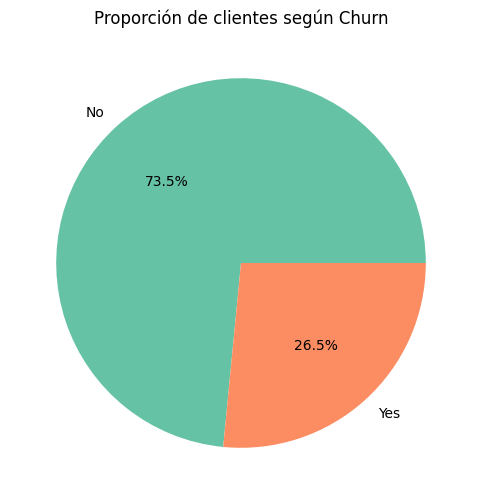

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

churn_counts = df['Churn'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(hue=churn_counts.index, y=churn_counts.values, palette='Set2')
plt.title('Distribución de la variable Churn')
plt.xlabel('Churn')
plt.ylabel('Cantidad de clientes')
plt.show()


plt.figure(figsize=(6,6))
plt.pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Proporción de clientes según Churn')
plt.show()

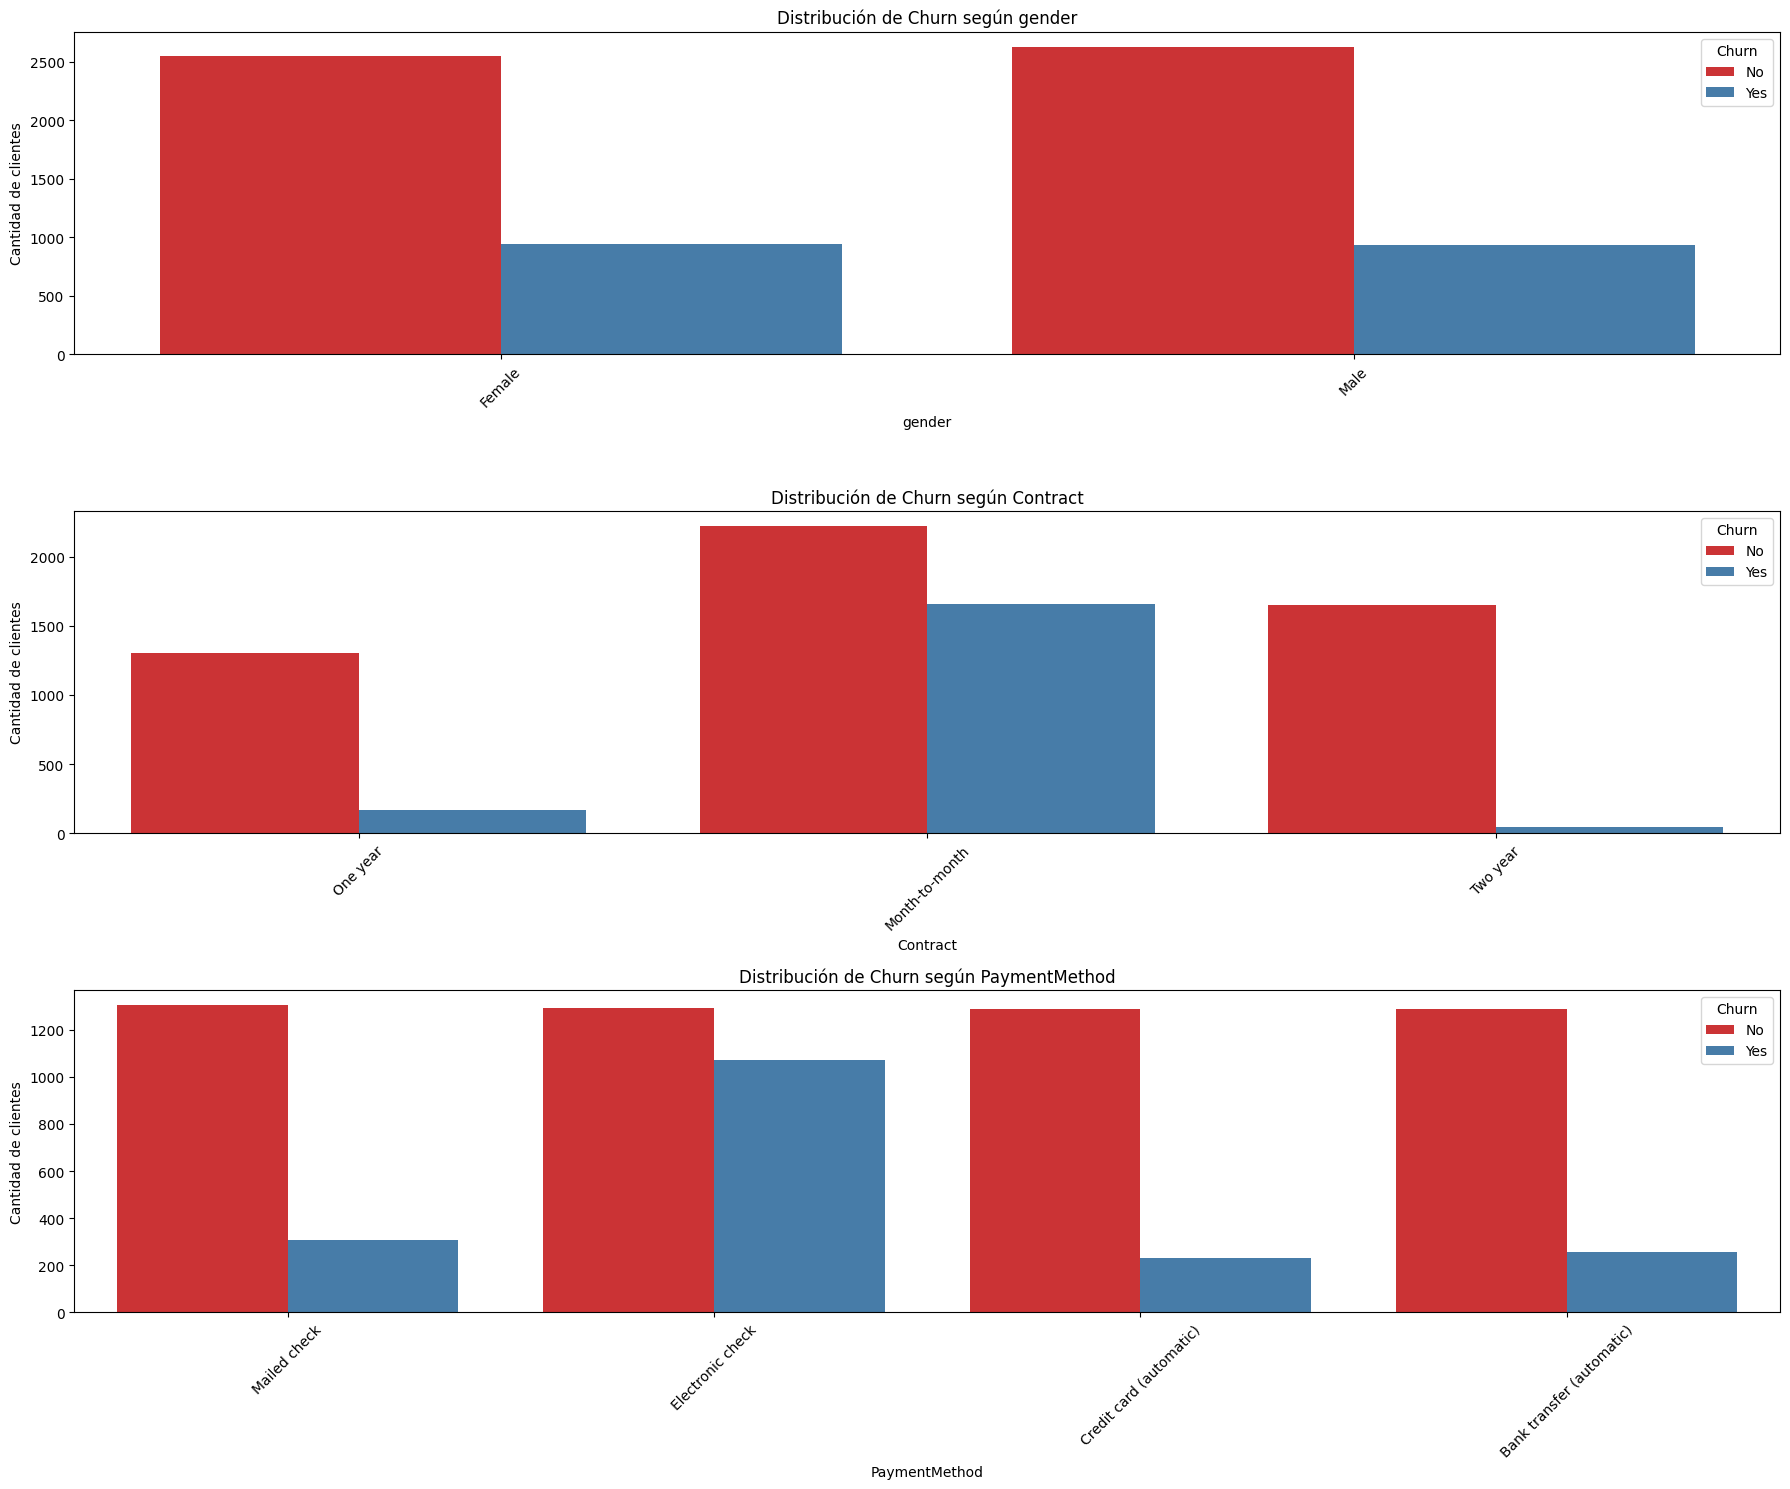

In [24]:
categorical_vars = ['gender', 'Contract', 'PaymentMethod']

plt.figure(figsize=(18, 5 * len(categorical_vars)))

for i, var in enumerate(categorical_vars, 1):
    plt.subplot(len(categorical_vars), 1, i)
    sns.countplot(data=df, x=var, hue='Churn', palette='Set1')
    plt.title(f'Distribución de Churn según {var}')
    plt.xlabel(var)
    plt.ylabel('Cantidad de clientes')
    plt.legend(title='Churn')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

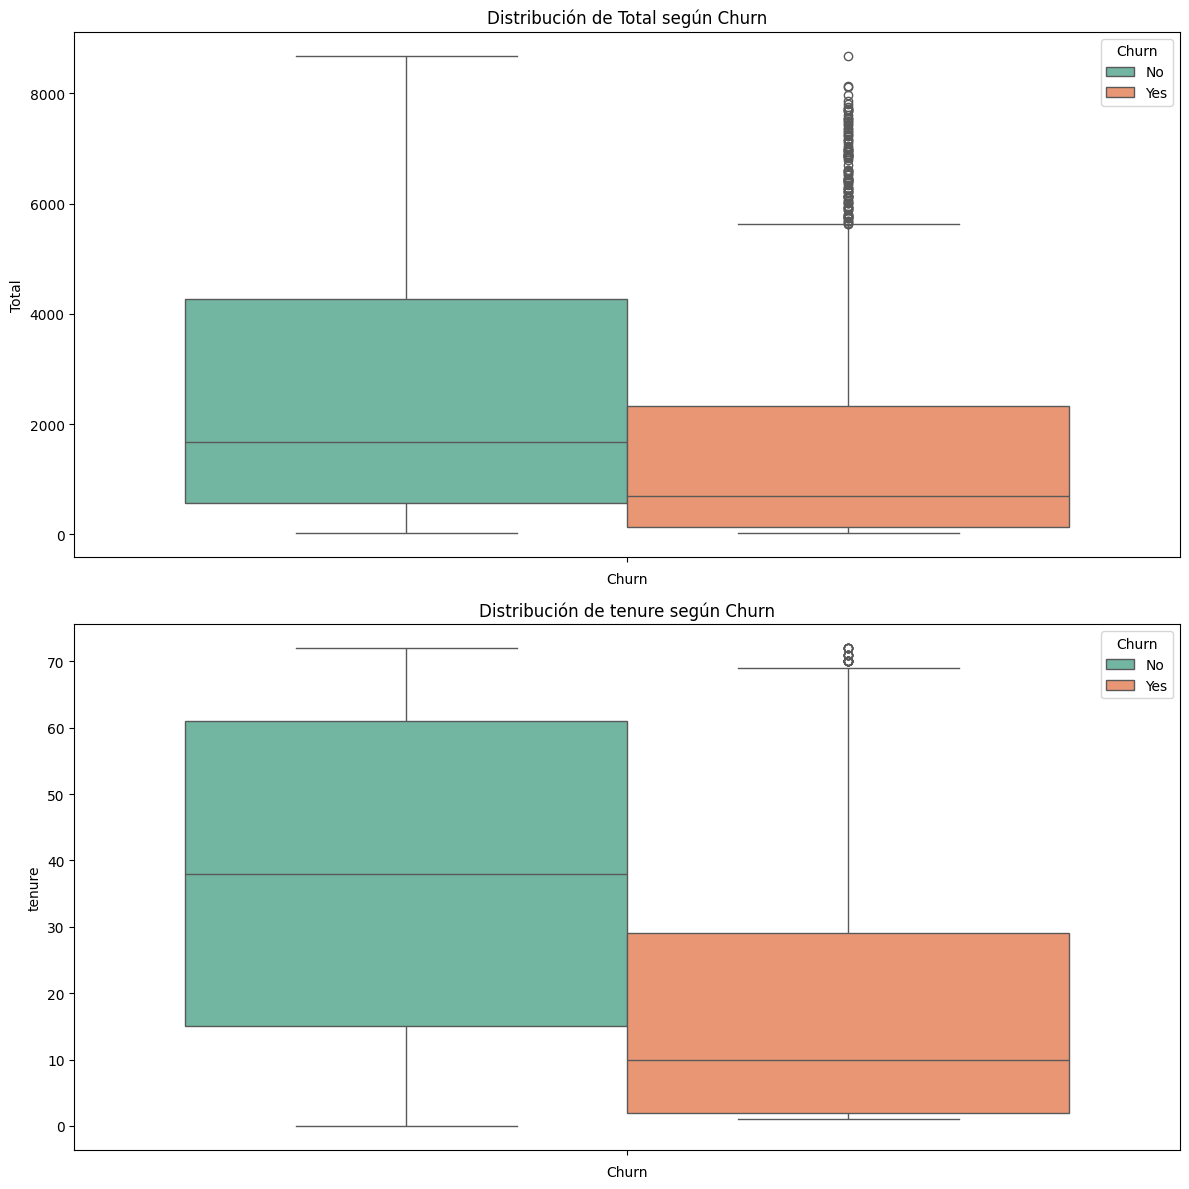

In [26]:
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')

numeric_vars = ['Total', 'tenure']

plt.figure(figsize=(12, 6 * len(numeric_vars)))

for i, var in enumerate(numeric_vars, 1):
    plt.subplot(len(numeric_vars), 1, i)
    sns.boxplot(data=df, hue='Churn', y=var, palette='Set2')
    plt.title(f'Distribución de {var} según Churn')
    plt.xlabel('Churn')
    plt.ylabel(var)

plt.tight_layout()
plt.show()

In [27]:
df.to_csv("TelecomX_clean_data.csv", index=False)
print("✅ Archivo CSV generado con éxito.")

✅ Archivo CSV generado con éxito.


#📄Informe final

##Introducción

La evasión de clientes (churn) representa uno de los principales retos para las organizaciones, ya que impacta directamente en la estabilidad de ingresos, la reputación de la empresa y la fidelización del mercado. Analizar este fenómeno permite identificar los factores que influyen en la decisión de los clientes de dejar de consumir un producto o servicio, tales como el nivel de satisfacción, la calidad percibida, la atención recibida, la competitividad de precios o la existencia de alternativas más atractivas. Comprender estas causas es esencial para diseñar estrategias que fortalezcan la retención, optimicen la experiencia del cliente y generen relaciones sostenibles a largo plazo.

###Objetivo
El objetivo de este análisis utilizando concpeto de ETL (Extracción, transformación y carga) para desarrollar estrategias conforme a los resultados

###Limpieza y tratamiento de datos
El proposito de este paso fue identificar los tipos de datos existentes en el DataFrame(df), posteriormente separamos la información dentro de los diccionarios debido a que era información crucial para el análisis.

###Análisis Exploratorio de Datos
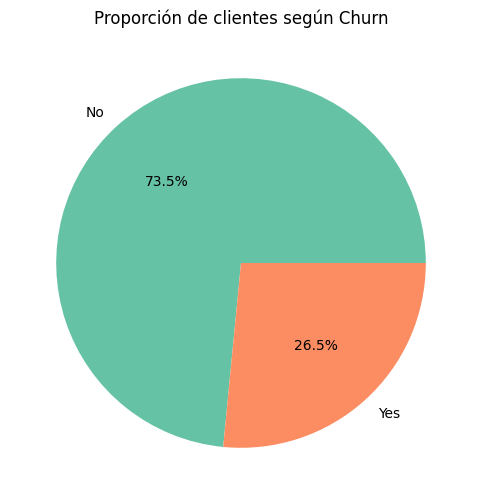


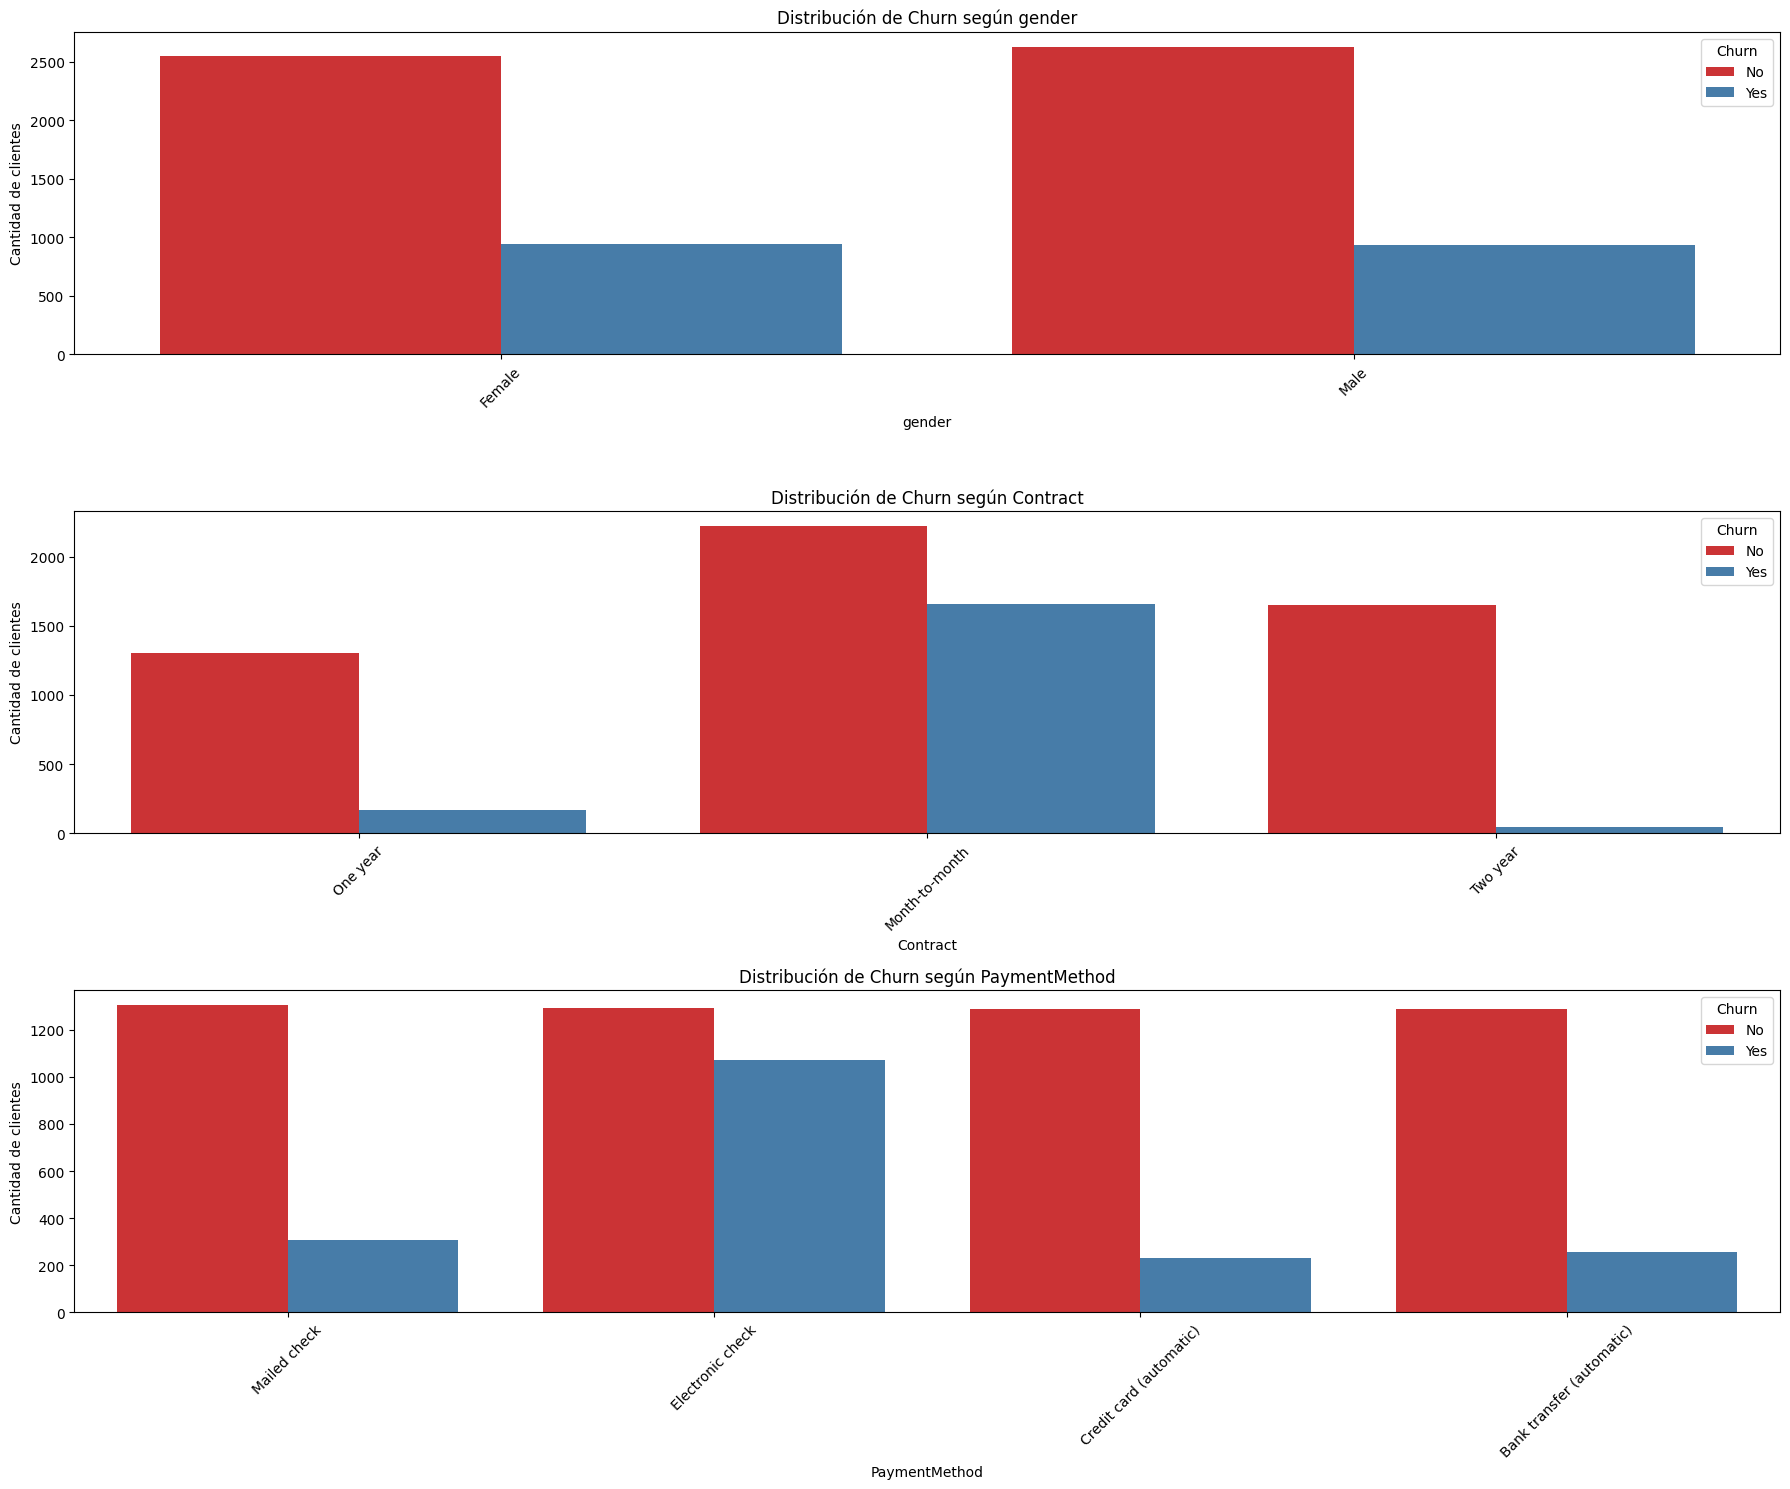


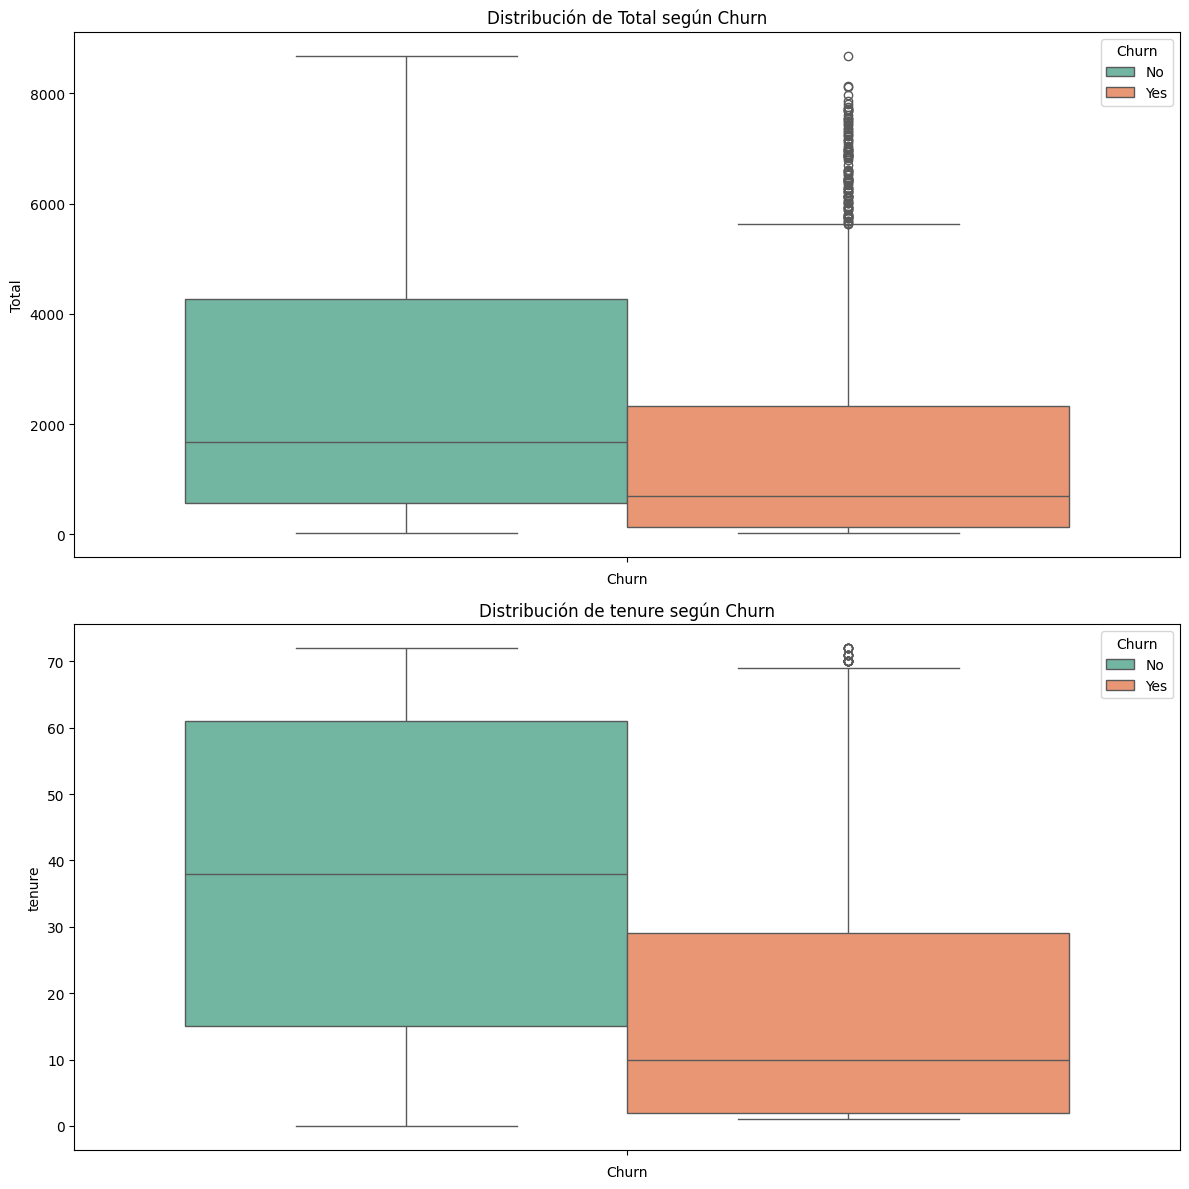
###Conclusiones e Insights
La empresa tiene una base sólida de clientes retenidos (73.5%), pero el churn del 26.5% representa una amenaza importante que debe abordarse con estrategias de retención y fidelización. A su vez el género no influye en la evasión, los clientes con contratos mensuales son los más propensos a abandonar, los usuarios que pagan con cheque electrónico tienen una alta tasa de churn, mientras que los métodos automáticos retienen mejor. Y también, Los clientes que abandonan tienden a gastar menos en total que los que se mantienen, existe una relación clara entre bajo tiempo de permanencia y alta probabilidad de churn y la evasión de clientes ocurre principalmente en los primeros meses de relación con la tienda
###Recomendaciones:

Algunas recomendaciones son:
Fortalecer estrategias de onboarding y retención temprana, ya que el churn ocurre sobre todo al inicio.

Diseñar programas de fidelización progresiva (ej. descuentos o beneficios después de ciertos meses) para aumentar el tenure.

Segmentar clientes con bajo gasto y poco tiempo de permanencia para darles atención especial antes de que se vayan.
